### 📌 Project Title: Auto MPG Regression Analysis using Linear Regression

In this project, we perform a regression analysis on the Auto MPG dataset from the UCI Machine Learning Repository. The goal is to predict the **miles per gallon (MPG)** of a car based on various features such as the number of cylinders, horsepower, weight, and engine displacement.

This dataset is used for demonstrating regression tasks in machine learning, especially when predicting continuous target variables.


**Linear regression** models the relationship between a **dependent variable** (also called the target or response) and one or more **independent variables** (also called features or predictors) by fitting a linear equation to the observed data.

The general form of a linear regression model is:

    y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

Where:
- `y` is the target (in our case, MPG),
- `x₁, x₂, ..., xₙ` are the input features (e.g., weight, horsepower),
- `β₀` is the intercept,
- `β₁, ..., βₙ` are the coefficients,
- `ε` is the error term (residual).

We use **linear regression** here because we are dealing with a regression problem: predicting a **continuous value** (MPG). It provides a good baseline for more complex models and helps in understanding feature importance through coefficients.


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

sns.set(style="whitegrid")

 ### Dataset Overview

The dataset includes the following features:

- `mpg`: Miles per gallon (target variable)
- `cylinders`: Number of cylinders in the engine
- `displacement`: Engine displacement in cubic inches
- `horsepower`: Engine horsepower
- `weight`: Vehicle weight in pounds
- `acceleration`: Time to accelerate from 0 to 60 mph
- `model_year`: Model year of the car
- `origin`: Geographic origin (encoded as categorical values)
- `car_name`: Name of the car

Some preprocessing steps include:
- Handling missing values
- Encoding categorical variables (`origin`)
- Dropping irrelevant columns (`car_name`)


In [93]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
           'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, sep='\s+', names=columns, na_values='?')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [94]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [95]:
df.dropna(inplace=True)

In [96]:
df.drop('car_name', axis=1, inplace=True)

To include the categorical variable `origin` in our regression model, we applied **one-hot encoding** using `pd.get_dummies()`. This method transforms the `origin` column into multiple binary (0 or 1) columns — one for each unique category. Since regression models require numerical input, this encoding allows the algorithm to use categorical data effectively.

We set `drop_first=True` to avoid the **dummy variable trap**, which occurs when one of the dummy variables can be perfectly predicted from the others, leading to **multicollinearity**. Multicollinearity can make the regression model unstable and distort the interpretation of coefficients. By dropping the first category, we eliminate this issue while still preserving all necessary information.



In [97]:
df = pd.get_dummies(df, columns=['origin'], prefix='origin', drop_first=True)

In [98]:
df.reset_index(drop=True, inplace=True)

In [99]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,False,False
388,44.0,4,97.0,52.0,2130.0,24.6,82,True,False
389,32.0,4,135.0,84.0,2295.0,11.6,82,False,False
390,28.0,4,120.0,79.0,2625.0,18.6,82,False,False


### Exploratory Data Analysis

Before training a model, we explore the relationships between variables using:

- **Pair plots** to visualize trends and potential correlations.
- **Heatmaps** of correlation matrices to understand linear relationships.

Key observations:
- `weight` and `displacement` have a strong negative correlation with `mpg`.


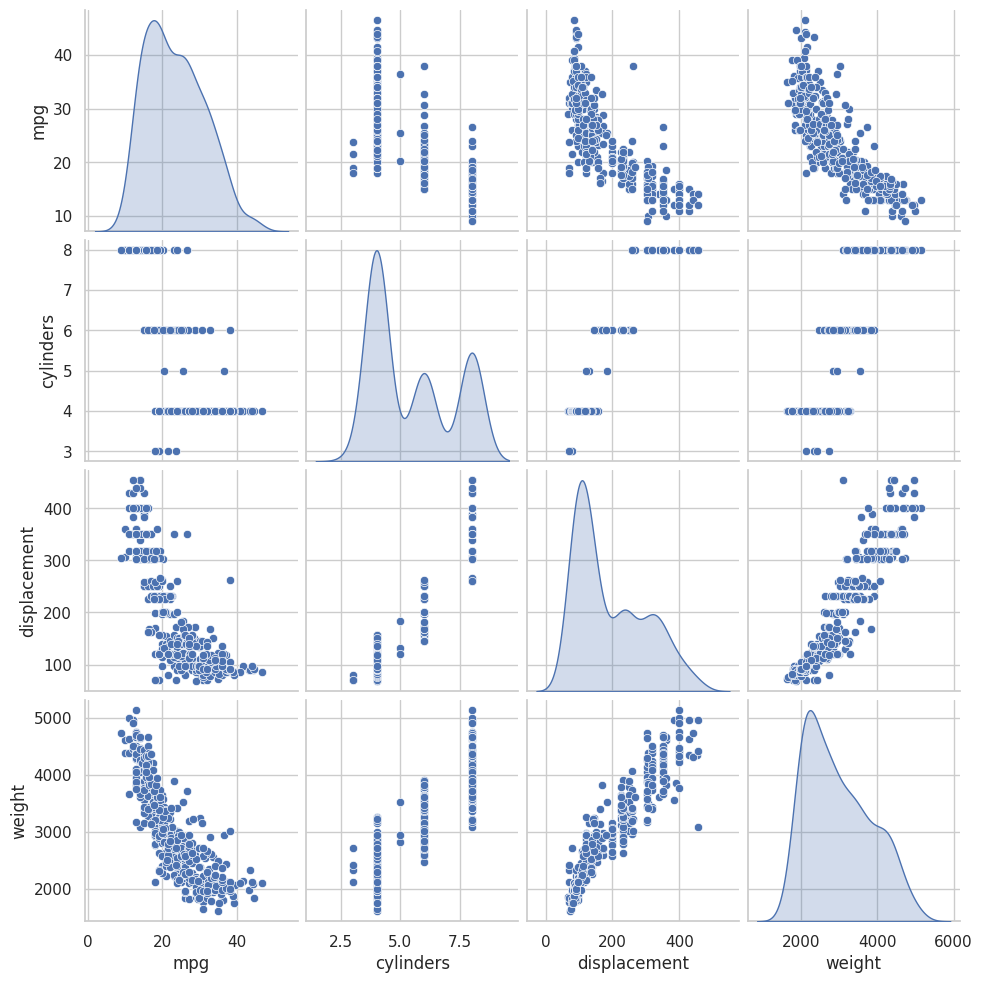

In [100]:
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'weight']], diag_kind="kde")
plt.show()

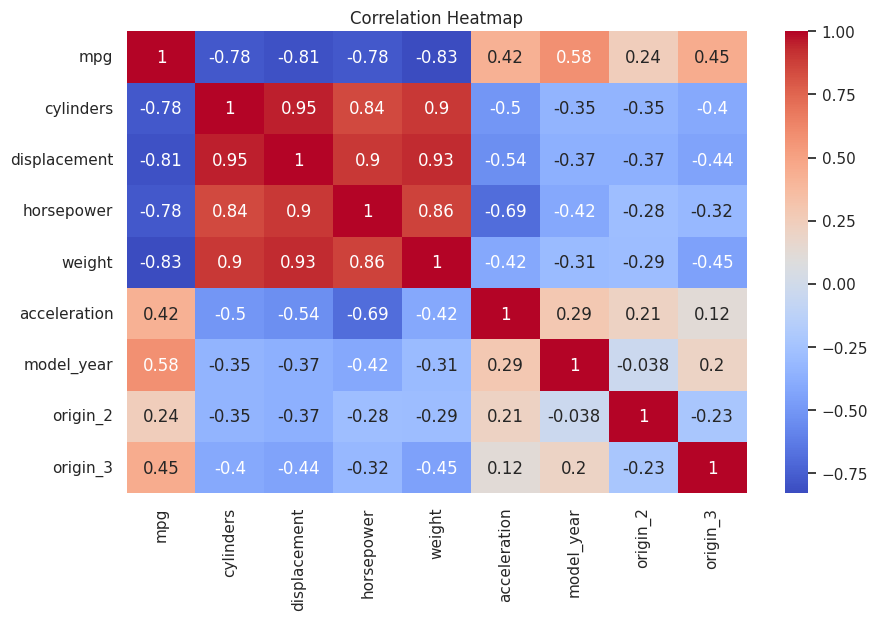

In [101]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Model Training

We split the dataset into a training and a test set using an 80/20 ratio. Then we train a **Linear Regression** model on the training data.

The model learns the best-fitting line (or hyperplane in higher dimensions) to minimize the squared error between the predicted and actual MPG values.


In [102]:
X = df.drop('mpg',axis=1)
y = df['mpg']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_test)

### Model Evaluation
To evaluate the model's performance, we use the following metrics:

- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Lower MSE means better performance.

- **R² Score (Coefficient of Determination)**: Measures how well the regression model explains the variance in the target variable.

$$ R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}} $$

Values range from 0 to 1. A value close to 1 indicates a good fit.

Additionally, we visualize predictions vs actual MPG to see how close the model is to real values.


In [107]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [108]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 10.60
R² Score: 0.79


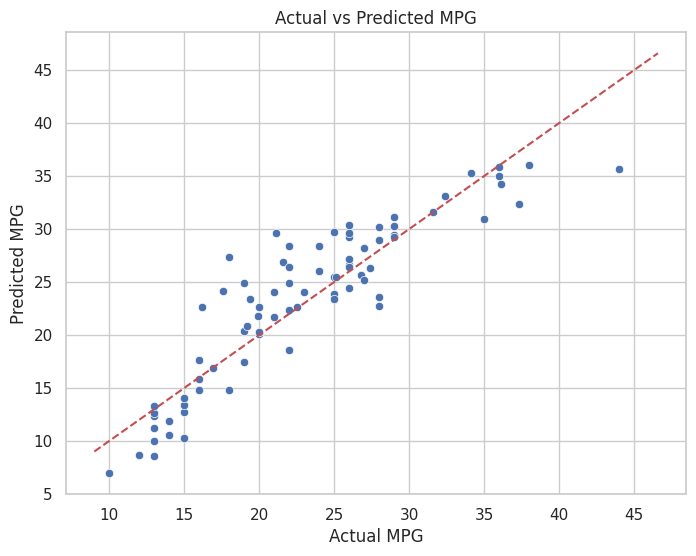

In [109]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

### Conclusion

- **Linear regression** is a good starting point for predicting car fuel efficiency.
- The model performed reasonably well, with decent R² and MSE scores.
- Most influential features were `weight`and `displacement`.

**Possible improvements**:
- Try polynomial or non-linear regression models.
- Use regularization techniques (Ridge, Lasso).
- Perform feature scaling and normalization.
- Explore ensemble models like Random Forest or Gradient Boosting.

